In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline

restaurant_dataset = []
for line in open('餐廳資料集.json', 'r'):
    restaurant_dataset.append(json.loads(line))

restaurant_df = pd.DataFrame(restaurant_dataset)
print(len(restaurant_df))
restaurant_df.head()

14


,address_city,address_country,address_street,address_town,address_zipcode,branch_store_name,category_id,content,created_at,full_name,...,opening_hours,other,rating_avg,rating_count,source,telephone,updated_at,url,view,date
0,台北市,TW,中山北路一段121巷18號1樓,中山區,,神山,0,,1554707016,麵屋武藏神山,...,,"{""credit_card_payment"":{""other"":[]},""mobile_pa...",4.75,4,,02 2542 8222,1569482181,"{""cover_image_url"":"""",""website"":"""",""facebook"":...",10098,20210701
1,高雄市,TW,三多三路213號，新光三越B2,苓雅區,,,0,,1554708944,麵屋武藏嚴虎店,...,,"{""payment_method"":[],""equipment"":[]}",0.00,0,,,1569484083,"{""cover_image_url"":"""",""website"":"""",""facebook"":...",6,20210701
2,台北市,TW,林森北路133巷3號,中山區,104,,0,,1554708011,八條老宅麻辣鍋林森北路133巷3號,...,"[""Mo 17:30-24:00"", ""Tu-Su 00:00-03:00"", ""Tu-Su...","{""payment_method"":[],""equipment"":[]}",4.33,9,,02 2562 2015,1583133333,"{""cover_image_url"":"""",""website"":"""",""facebook"":...",7876,20210701
3,台北市,TW,忠孝西路一段36號B1,中正區,,本店,0,,1554718600,麵屋武藏本店,...,"[""Mo-Su 11:00-22:00""]","{""credit_card_payment"":{""other"":[]},""mobile_pa...",4.25,4,,02 2371 1889,1583136635,"{""cover_image_url"":"""",""website"":"""",""facebook"":...",10909,20210701
4,高雄市,TW,中華五路789號,前鎮區,,,0,,1554712016,麵屋武藏武骨相傳店,...,"[""Mo-Su 11:00-22:00""]","{""credit_card_payment"":{""other"":[]},""mobile_pa...",5.00,1,,07 8127 198,1583134929,"{""cover_image_url"":"""",""website"":"""",""facebook"":...",1336,20210701


In [102]:
restaurant_df.columns

Index(['address_city', 'address_country', 'address_street', 'address_town',
       'address_zipcode', 'branch_store_name', 'category_id', 'content',
       'created_at', 'full_name', 'hash_id', 'id', 'latitude', 'longitude',
       'money', 'name', 'opening_hours', 'other', 'rating_avg', 'rating_count',
       'source', 'telephone', 'updated_at', 'url', 'view', 'date'],
      dtype='object')

In [4]:
restaurant_df['address_city'].unique()

array(['台北市', '高雄市', '', '新北市', '台南市'], dtype=object)

<AxesSubplot:xlabel='address_city', ylabel='count'>

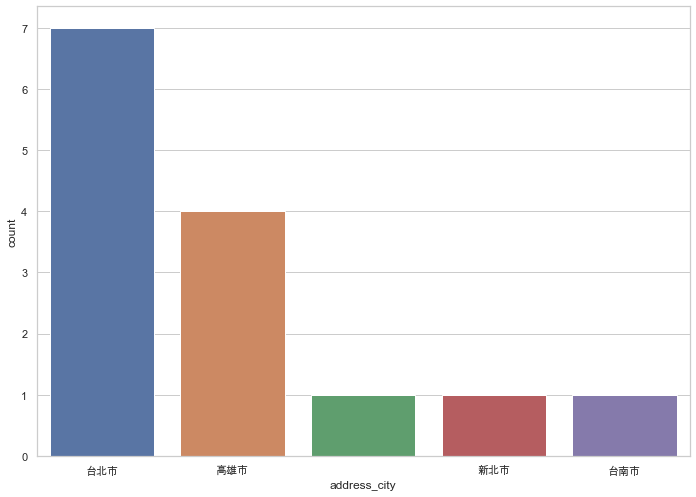

In [94]:
plt.rcParams['font.family'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
sns.countplot(x="address_city", data=restaurant_df)

In [14]:
list(restaurant_df['name'].unique())

['麵屋武藏', '麵屋武藏嚴虎店', '八條老宅麻辣鍋', '麵屋武藏武骨相傳店', '狸爐端燒日式料理', '龍都酒樓', '麵屋武藏虎洞']

In [123]:
import jieba

jieba.set_dictionary('restaurant_dict.txt')

for store in list(restaurant_df['name'].unique()):
    seg_list = jieba.cut(store)
    print(list(seg_list))

Building prefix dict from /Users/johntung/Documents/workspace/pixnet/restaurant_dict.txt ...
Dumping model to file cache /var/folders/lw/60jnkyl50ps9xdbnpkwvhjlw0000gn/T/jieba.u46ba827fd68fb182c6c77854bcbf4205.cache
Loading model cost 0.019 seconds.
Prefix dict has been built successfully.


['麵屋武藏']
['麵屋武藏', '嚴虎店']
['八條老宅', '麻辣鍋']
['麵屋武藏', '武骨', '相傳店']
['狸爐端燒', '日式', '料理']
['龍都酒樓']
['麵屋武藏', '虎洞']


<AxesSubplot:xlabel='name', ylabel='count'>

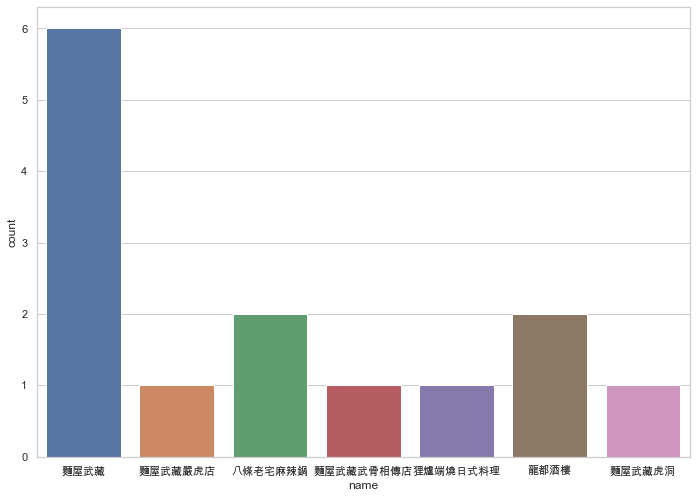

In [95]:
sns.countplot(x="name", data=restaurant_df)

In [101]:
store_name = ['麵屋武藏', '八條老宅', '狸爐端燒', '龍都酒樓']

In [55]:
article_dataset = []
for line in open('文章資料集.json', 'r'):
    article_dataset.append(json.loads(line))
    
article_df = pd.DataFrame(article_dataset)
print(len(article_df))
article_df.head()

4790


,url,author,category,title,tags,content,post_at
0,http://a71715901.pixnet.net/blog/post/459628330,a71715901,不設分類,追番用筆記,[],"<p><span lang=""EN-US"" style=""font-family:新細明體;...",1499426160
1,http://annamami.pixnet.net/blog/post/35531965,annamami,不設分類,♥ 懷孕24週 - D.I.Y 包被 &amp; 婚紗相 ♥,[],"<span><font color=""#5b5b5b""><br><p align=""cent...",1304609580
2,http://buyee.pixnet.net/blog/post/268285532,buyee,不設分類,日本集運比較 - 原文:◆良い色!!手削りマラカイト（孔雀石 ）極小一連◆トンボ玉...,"[日本集運, 日本必買, 日本公仔, 日本金證, 日本鐵瓶, 日本委運, 汽車鋁圈, 汽車保...",\t\t<bR>\n\t\t\n\t\t已經有購買管道:<a href='http://tw...,1545328912
3,http://d12qm7.pixnet.net/blog/post/155589104,d12qm7,不設分類,【NIKE 耐吉】WMNS AIR ZOOM STRUCTURE 19 慢跑鞋(女 806...,[],"<table align=""center""><tr><td align=""center""><...",1468558516
4,http://hideki13.pixnet.net/blog/post/218084016,hideki13,美味食記,|台北|【中山區❤麵屋武藏神山】好吃的日式拉麵與特別的蒜末 (初嚐2020-02) ~~~ ...,"[麵屋武藏神山, 麵屋武藏, 麵屋武藏菜單, 台北好吃拉麵, 海嘯強尼, 美食, 食記, 小...","<div class=""x-p-ext-img""><a href=""https://phot...",1580634000


In [56]:
article_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790 entries, 0 to 4789
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   url       4790 non-null   object
 1   author    4790 non-null   object
 2   category  4790 non-null   object
 3   title     4790 non-null   object
 4   tags      4790 non-null   object
 5   content   4788 non-null   object
 6   post_at   4790 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 262.1+ KB


In [57]:
article_df = article_df[article_df['content'].notnull()]
article_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4788 entries, 0 to 4789
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   url       4788 non-null   object
 1   author    4788 non-null   object
 2   category  4788 non-null   object
 3   title     4788 non-null   object
 4   tags      4788 non-null   object
 5   content   4788 non-null   object
 6   post_at   4788 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 299.2+ KB


<AxesSubplot:xlabel='category', ylabel='count'>

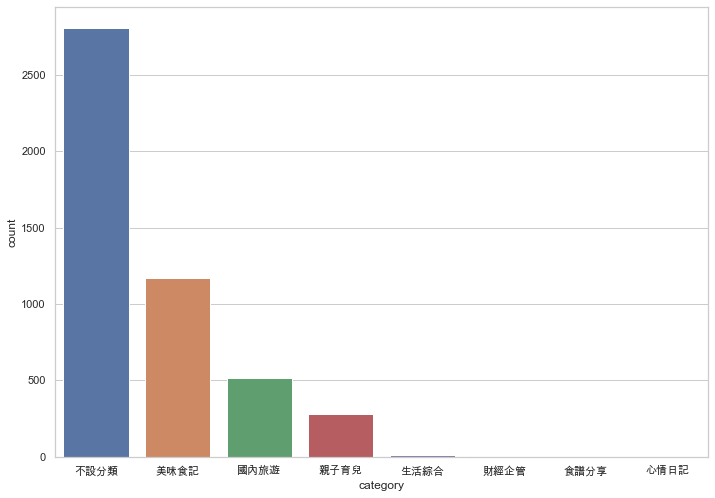

In [96]:
sns.countplot(x="category", data=article_df)

In [124]:
restaurant_in_article = article_df[article_df['content'].str.contains('|'.join(store_name))].reset_index(drop=True)
print(len(restaurant_in_article))
restaurant_in_article.head()

577


,url,author,category,title,tags,content,post_at
0,http://hideki13.pixnet.net/blog/post/218084016,hideki13,美味食記,|台北|【中山區❤麵屋武藏神山】好吃的日式拉麵與特別的蒜末 (初嚐2020-02) ~~~ ...,"[麵屋武藏神山, 麵屋武藏, 麵屋武藏菜單, 台北好吃拉麵, 海嘯強尼, 美食, 食記, 小...","<div class=""x-p-ext-img""><a href=""https://phot...",1580634000
1,http://hideki13.pixnet.net/blog/post/96933229,hideki13,美味食記,|台北|【中山區。八條老宅麻辣鍋】(曾初嚐2017-01) ~~~ @海嘯強尼在地日常食記,"[八條老宅麻辣鍋, 九寨十鍋, 海嘯強尼, 美食, 小吃, 必吃, 台北美食, 台北食記, ...","<p><a href=""http://hideki13.pixnet.net/album/p...",1485302400
2,http://ivychang98.pixnet.net/blog/post/105122762,ivychang98,美味食記,台北中山區~麵屋武藏神山 驚人的一本拉麵,"[拉麵, 麵屋武藏, 神山, 中山區拉麵]","<p><span style=""font-size: 12pt;""><a href=""htt...",1400846774
3,http://long0623.pixnet.net/blog/post/30707580,long0623,不設分類,龍都酒樓 (上),[],<!-- Origin Article URL: http://www.wretch.cc/...,1275768600
4,http://qqdcat.pixnet.net/blog/post/30971449,qqdcat,美味食記,食記053║台北中山【龍都酒樓】這輩子一定要吃到的龍都烤鴨,[],"<p><span style=""font-size: 14pt;""><a href=""htt...",1343229737


In [126]:
from bs4 import BeautifulSoup

restaurant_in_article['content'] = [BeautifulSoup(content).text for content in restaurant_in_article['content']]
print(len(restaurant_in_article))
restaurant_in_article.head()

577


,url,author,category,title,tags,content,post_at
0,http://hideki13.pixnet.net/blog/post/218084016,hideki13,美味食記,|台北|【中山區❤麵屋武藏神山】好吃的日式拉麵與特別的蒜末 (初嚐2020-02) ~~~ ...,"[麵屋武藏神山, 麵屋武藏, 麵屋武藏菜單, 台北好吃拉麵, 海嘯強尼, 美食, 食記, 小...",\n➤跟朋友賞完櫻花與瀑布後\n雖然才下午五點多\n但也許是天氣太冷了\n想吃點熱呼呼的 ...,1580634000
1,http://hideki13.pixnet.net/blog/post/96933229,hideki13,美味食記,|台北|【中山區。八條老宅麻辣鍋】(曾初嚐2017-01) ~~~ @海嘯強尼在地日常食記,"[八條老宅麻辣鍋, 九寨十鍋, 海嘯強尼, 美食, 小吃, 必吃, 台北美食, 台北食記, ...",\n➤在吃九寨十鍋前~\n八條老宅原本才是自己心中\n最期待的麻辣火鍋店\n \n晚上八點...,1485302400
2,http://ivychang98.pixnet.net/blog/post/105122762,ivychang98,美味食記,台北中山區~麵屋武藏神山 驚人的一本拉麵,"[拉麵, 麵屋武藏, 神山, 中山區拉麵]",剛搬來神山這附近時，其實我根本不知道這裡有家拉麵店，因為我一直誤以為所有排隊的人都在排鰻魚飯...,1400846774
3,http://long0623.pixnet.net/blog/post/30707580,long0623,不設分類,龍都酒樓 (上),[],烤鴨烤鴨烤鴨!!已經好多次都沒跟到哩這回趁怡君以及小菁回台蘇董邀約在龍都酒樓吃烤鴨上週五滴滴...,1275768600
4,http://qqdcat.pixnet.net/blog/post/30971449,qqdcat,美味食記,食記053║台北中山【龍都酒樓】這輩子一定要吃到的龍都烤鴨,[],餐廳名稱：龍都酒樓消費時間：2012/07/25地址：台北市中山區中山北路一段105巷18之...,1343229737


In [127]:
restaurant_in_article['content_segment'] = [' '.join(list(jieba.cut(content))) for content in restaurant_in_article['content']]
print(len(restaurant_in_article))
restaurant_in_article.head()

577


,url,author,category,title,tags,content,post_at,content_segment
0,http://hideki13.pixnet.net/blog/post/218084016,hideki13,美味食記,|台北|【中山區❤麵屋武藏神山】好吃的日式拉麵與特別的蒜末 (初嚐2020-02) ~~~ ...,"[麵屋武藏神山, 麵屋武藏, 麵屋武藏菜單, 台北好吃拉麵, 海嘯強尼, 美食, 食記, 小...",\n➤跟朋友賞完櫻花與瀑布後\n雖然才下午五點多\n但也許是天氣太冷了\n想吃點熱呼呼的 ...,1580634000,\n ➤ 跟 朋友賞 完櫻花 與 瀑布 後 \n 雖然 才 下午 五點 多 \n 但 也...
1,http://hideki13.pixnet.net/blog/post/96933229,hideki13,美味食記,|台北|【中山區。八條老宅麻辣鍋】(曾初嚐2017-01) ~~~ @海嘯強尼在地日常食記,"[八條老宅麻辣鍋, 九寨十鍋, 海嘯強尼, 美食, 小吃, 必吃, 台北美食, 台北食記, ...",\n➤在吃九寨十鍋前~\n八條老宅原本才是自己心中\n最期待的麻辣火鍋店\n \n晚上八點...,1485302400,\n ➤ 在 吃 九寨 十鍋 前 ~ \n 八條老宅 原本 才 是 自己 心中 \n 最...
2,http://ivychang98.pixnet.net/blog/post/105122762,ivychang98,美味食記,台北中山區~麵屋武藏神山 驚人的一本拉麵,"[拉麵, 麵屋武藏, 神山, 中山區拉麵]",剛搬來神山這附近時，其實我根本不知道這裡有家拉麵店，因為我一直誤以為所有排隊的人都在排鰻魚飯...,1400846774,剛搬 來 神山 這附近 時 ， 其實 我 根本 不 知道 這裡 有家 拉 麵 店 ， 因為 ...
3,http://long0623.pixnet.net/blog/post/30707580,long0623,不設分類,龍都酒樓 (上),[],烤鴨烤鴨烤鴨!!已經好多次都沒跟到哩這回趁怡君以及小菁回台蘇董邀約在龍都酒樓吃烤鴨上週五滴滴...,1275768600,烤 鴨 烤 鴨 烤 鴨 ! ! 已經 好 多次 都 沒 跟 到 哩 這回 趁怡君 以及 小菁...
4,http://qqdcat.pixnet.net/blog/post/30971449,qqdcat,美味食記,食記053║台北中山【龍都酒樓】這輩子一定要吃到的龍都烤鴨,[],餐廳名稱：龍都酒樓消費時間：2012/07/25地址：台北市中山區中山北路一段105巷18之...,1343229737,餐廳 名稱 ： 龍都酒樓 消費 時間 ： 2012 / 07 / 25 地址 ： 台北市 中...


<AxesSubplot:xlabel='category', ylabel='count'>

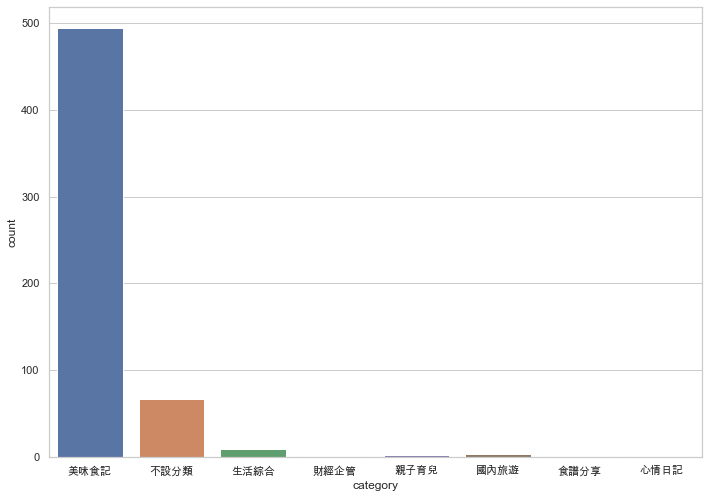

In [156]:
sns.countplot(x="category", data=restaurant_in_article)

In [146]:
from sklearn import feature_extraction  
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize

vectorizer = CountVectorizer(stop_words=None, token_pattern="(?u)\\b\\w+\\b")  
X = vectorizer.fit_transform(list(restaurant_in_article['content_segment']))
r = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
print("CountVector")
r[store_name]

CountVector


,麵屋武藏,八條老宅,狸爐端燒,龍都酒樓
0,4,0,0,0
1,0,2,0,0
2,2,0,0,0
3,0,0,0,1
4,0,0,0,3
...,...,...,...,...
572,0,0,0,6
573,0,0,0,2
574,0,2,0,0
575,0,2,0,0


In [151]:
transformer = TfidfTransformer(smooth_idf=True)
Z = transformer.fit_transform(X)
r = pd.DataFrame(Z.toarray(),columns=vectorizer.get_feature_names(), index=list(range(0, len(restaurant_in_article))))
print("TFIDF")
r[store_name]

TFIDF


,麵屋武藏,八條老宅,狸爐端燒,龍都酒樓
0,0.062869,0.000000,0.0,0.000000
1,0.000000,0.081640,0.0,0.000000
2,0.083694,0.000000,0.0,0.000000
3,0.000000,0.000000,0.0,0.029183
4,0.000000,0.000000,0.0,0.027944
...,...,...,...,...
572,0.000000,0.000000,0.0,0.042095
573,0.000000,0.000000,0.0,0.040887
574,0.000000,0.119741,0.0,0.000000
575,0.000000,0.098160,0.0,0.000000


In [162]:
restaurant_in_article = pd.concat([restaurant_in_article,r[store_name]], axis=True)
print(len(restaurant_in_article))
restaurant_in_article.head()

577


,url,author,category,title,tags,content,post_at,content_segment,麵屋武藏,八條老宅,狸爐端燒,龍都酒樓
0,http://hideki13.pixnet.net/blog/post/218084016,hideki13,美味食記,|台北|【中山區❤麵屋武藏神山】好吃的日式拉麵與特別的蒜末 (初嚐2020-02) ~~~ ...,"[麵屋武藏神山, 麵屋武藏, 麵屋武藏菜單, 台北好吃拉麵, 海嘯強尼, 美食, 食記, 小...",\n➤跟朋友賞完櫻花與瀑布後\n雖然才下午五點多\n但也許是天氣太冷了\n想吃點熱呼呼的 ...,1580634000,\n ➤ 跟 朋友賞 完櫻花 與 瀑布 後 \n 雖然 才 下午 五點 多 \n 但 也...,0.062869,0.00000,0.0,0.000000
1,http://hideki13.pixnet.net/blog/post/96933229,hideki13,美味食記,|台北|【中山區。八條老宅麻辣鍋】(曾初嚐2017-01) ~~~ @海嘯強尼在地日常食記,"[八條老宅麻辣鍋, 九寨十鍋, 海嘯強尼, 美食, 小吃, 必吃, 台北美食, 台北食記, ...",\n➤在吃九寨十鍋前~\n八條老宅原本才是自己心中\n最期待的麻辣火鍋店\n \n晚上八點...,1485302400,\n ➤ 在 吃 九寨 十鍋 前 ~ \n 八條老宅 原本 才 是 自己 心中 \n 最...,0.000000,0.08164,0.0,0.000000
2,http://ivychang98.pixnet.net/blog/post/105122762,ivychang98,美味食記,台北中山區~麵屋武藏神山 驚人的一本拉麵,"[拉麵, 麵屋武藏, 神山, 中山區拉麵]",剛搬來神山這附近時，其實我根本不知道這裡有家拉麵店，因為我一直誤以為所有排隊的人都在排鰻魚飯...,1400846774,剛搬 來 神山 這附近 時 ， 其實 我 根本 不 知道 這裡 有家 拉 麵 店 ， 因為 ...,0.083694,0.00000,0.0,0.000000
3,http://long0623.pixnet.net/blog/post/30707580,long0623,不設分類,龍都酒樓 (上),[],烤鴨烤鴨烤鴨!!已經好多次都沒跟到哩這回趁怡君以及小菁回台蘇董邀約在龍都酒樓吃烤鴨上週五滴滴...,1275768600,烤 鴨 烤 鴨 烤 鴨 ! ! 已經 好 多次 都 沒 跟 到 哩 這回 趁怡君 以及 小菁...,0.000000,0.00000,0.0,0.029183
4,http://qqdcat.pixnet.net/blog/post/30971449,qqdcat,美味食記,食記053║台北中山【龍都酒樓】這輩子一定要吃到的龍都烤鴨,[],餐廳名稱：龍都酒樓消費時間：2012/07/25地址：台北市中山區中山北路一段105巷18之...,1343229737,餐廳 名稱 ： 龍都酒樓 消費 時間 ： 2012 / 07 / 25 地址 ： 台北市 中...,0.000000,0.00000,0.0,0.027944


In [163]:
restaurant_in_article[restaurant_in_article['麵屋武藏'] > 0]

,url,author,category,title,tags,content,post_at,content_segment,麵屋武藏,八條老宅,狸爐端燒,龍都酒樓
0,http://hideki13.pixnet.net/blog/post/218084016,hideki13,美味食記,|台北|【中山區❤麵屋武藏神山】好吃的日式拉麵與特別的蒜末 (初嚐2020-02) ~~~ ...,"[麵屋武藏神山, 麵屋武藏, 麵屋武藏菜單, 台北好吃拉麵, 海嘯強尼, 美食, 食記, 小...",\n➤跟朋友賞完櫻花與瀑布後\n雖然才下午五點多\n但也許是天氣太冷了\n想吃點熱呼呼的 ...,1580634000,\n ➤ 跟 朋友賞 完櫻花 與 瀑布 後 \n 雖然 才 下午 五點 多 \n 但 也...,0.062869,0.0,0.000000,0.0
2,http://ivychang98.pixnet.net/blog/post/105122762,ivychang98,美味食記,台北中山區~麵屋武藏神山 驚人的一本拉麵,"[拉麵, 麵屋武藏, 神山, 中山區拉麵]",剛搬來神山這附近時，其實我根本不知道這裡有家拉麵店，因為我一直誤以為所有排隊的人都在排鰻魚飯...,1400846774,剛搬 來 神山 這附近 時 ， 其實 我 根本 不 知道 這裡 有家 拉 麵 店 ， 因為 ...,0.083694,0.0,0.000000,0.0
10,http://ninafuh.pixnet.net/blog/post/39029797,ninafuh,美味食記,[台北]麵屋武藏‧神山~,"[麵屋武藏神山, 麵屋武藏, 神山, 拉麵, 日本, 沾麵, 一本拉麵]",老弟從東京回來當天~還想著要吃拉麵~馬上揪我們晚餐去吃麵屋武藏神山~因為之前吃過虎嘯的印象很...,1384506064,老弟 從 東京 回來 當天 ~ 還想 著要 吃 拉 麵 ~ 馬 上 揪 我們 晚餐 去 吃 ...,0.067617,0.0,0.000000,0.0
14,http://z78625.pixnet.net/blog/post/202011487,z78625,美味食記,【台北捷運美食懶人包總整理】台北餐廳推薦/台北捷運美食攻略(文湖線、淡水信義線、松山新店線、...,"[黃線－中和新蘆線, 綠線－松山新店線, 紅線－淡水信義線, 棕線－文湖線, 台北捷運美食懶...",持續更新中....... \n海綿飽飽寫部落格有七年時間，文章超過3000篇\n20...,1441215840,持續 更 新 中 ....... \n 海綿 飽 飽 寫部 落格 有七年...,0.001975,0.0,0.002618,0.0
20,http://ninjafury.pixnet.net/blog/post/287943305,ninjafury,不設分類,20130726 麵屋武藏 麺屋武蔵 神山 (台北店),[],每日午、晚各限量 20 碗，誇張叉燒肉條的 一本拉麵 (一本ラーメン)\n\n--\n\n麵...,1374853800,每日午 、 晚 各限量 20 碗 ， 誇張 叉 燒肉條 的 一本 拉 麵 (...,0.139969,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
548,http://rmlove30.pixnet.net/blog/post/55637661,RMlove30,美味食記,中山站‧麵屋武藏神山青山復刻拉麵,[],\n \n除了超大份量的一本拉麵，麵屋武藏神山又推出限定版青山復刻鹽味拉麵，清爽淡雅風...,1390581234,\n \n 除 了 超大份量 的 一本 拉 麵 ， 麵屋武藏 神山 又 推出...,0.128091,0.0,0.000000,0.0
556,http://chentbtb.pixnet.net/blog/post/98962315,chentbtb,美味食記,[食記]台北 中山站 麵屋武藏神山,[],品嘗日期：2013.09.01\n台灣的拉麵店戰爭像看不見尾巴似的，每個月都不斷有新的店家來...,1378308150,品嘗 日期 ： 2013.09 . 01 \n 台灣 的 拉 麵 店 戰爭 像 看 不見 尾...,0.055367,0.0,0.000000,0.0
562,http://samch354.pixnet.net/blog/post/64387624,samch354,美味食記,麵屋武藏 神山,"[捷運中山站, 六條通, 日本拉麵]",\n最近老想要找點新的東西\n就來到已經聽聞很久的麵屋武藏\n這次來的是位於六條通商圈的神...,1475636400,\n 最近 老想 要 找點 新 的 東西 \n 就 來 到 已經 聽聞 很 久 的 麵屋...,0.052625,0.0,0.000000,0.0
564,http://foodtvbox.pixnet.net/blog/post/296914874,foodtvbox,不設分類,[食尚玩家]台北 (播出時間:2013-10-31),[],[大排長龍碳烤三明治]主題推薦的美食店家▼豐盛號官方網站豐盛號 或 ...搜尋食記官方網站豐...,1383876875,[ 大排 長 龍 碳 烤 三明治 ] 主題 推薦 的 美食 店家 ▼ 豐盛號 官方 網站 豐...,0.065466,0.0,0.000000,0.0


In [164]:
restaurant_in_article[restaurant_in_article['八條老宅'] > 0]

,url,author,category,title,tags,content,post_at,content_segment,麵屋武藏,八條老宅,狸爐端燒,龍都酒樓
1,http://hideki13.pixnet.net/blog/post/96933229,hideki13,美味食記,|台北|【中山區。八條老宅麻辣鍋】(曾初嚐2017-01) ~~~ @海嘯強尼在地日常食記,"[八條老宅麻辣鍋, 九寨十鍋, 海嘯強尼, 美食, 小吃, 必吃, 台北美食, 台北食記, ...",\n➤在吃九寨十鍋前~\n八條老宅原本才是自己心中\n最期待的麻辣火鍋店\n \n晚上八點...,1485302400,\n ➤ 在 吃 九寨 十鍋 前 ~ \n 八條老宅 原本 才 是 自己 心中 \n 最...,0.0,0.081640,0.000000,0.0
19,http://genious0516.pixnet.net/blog/post/118952635,genious0516,美味食記,[雪莉丸食記]2018.9月台北中山-海鮮好吃的八條老宅麻辣鍋,[],八條老宅麻辣鍋\n台北市林森北路133巷3號 捷運中山站走過來大概15分吧\n02-2...,1538807706,八條老宅 麻辣鍋 \n 台北市 林森北路 133 巷 3 號 捷運 中山 站...,0.0,0.081889,0.000000,0.0
31,http://rolahun.pixnet.net/blog/post/208564077,rolahun,美味食記,【台北⦿中山區⦿美食】八條老宅麻辣鍋 麻到入味香濃牛骨湯 超美味鴨血豆腐 附菜單MENU,"[台北美食, 中山美食, 麻辣鍋, 台北麻辣, 八條, 八條老宅, 鴨血豆腐, 入味, 牛小...",太棒了終於有機會寫最愛麻辣鍋名店了\n八條老宅自從吃過一次後直接深得我心再也離不開前三名榜了...,1531373710,太棒 了終 於 有 機會 寫 最愛麻辣鍋 名店 了 \n 八條老宅 自從 吃過 一次 後 直...,0.0,0.047815,0.000000,0.0
56,http://jetpeter.pixnet.net/blog/post/401130254,jetpeter,不設分類,(善導寺)吃過最好吃的麻辣鍋-台北中山八條老宅麻辣鍋,[],\n \n條通商圈內的人氣麻辣鍋\n \n 二樓有大圓桌、也有獨立包廂\n \n 價位算中...,1509013390,\n \n 條通 商圈 內 的 人氣 麻辣鍋 \n \n 二樓 有 大圓桌 ...,0.0,0.067347,0.000000,0.0
70,http://angela19722002.pixnet.net/blog/post/356...,angela19722002,美味食記,《台北。食記》裝潢走中國古典風@八條老宅麻辣鍋,"[台北, 八條老宅麻辣鍋, 麻辣鍋, 八條通, 八條通麻辣鍋]",啊，要先正名一下，原來是八條老宅，不是「八宅」啊 ...\n我本人對麻辣鍋較無感，但據說這家...,1573822800,啊 ， 要 先 正名 一下 ， 原來 是 八條老宅 ， 不是 「 八宅 」 啊 ... ...,0.0,0.094435,0.000000,0.0
80,http://zy0925.pixnet.net/blog/post/353292512,zy0925,美味食記,[ 台北食記 ] 貍爐端燒日式居酒屋 ｜林森北路八條通美食推薦 ｜台北特色居酒屋推薦,"[狸端爐燒, 狸端爐燒日式居酒屋, 林森北路美食, 林森北路日本料理, 林森北路美食小吃, ...",\n\n與閨蜜的聖誕節交換禮物聚餐來到位於中山區，林森北路八條通美食推薦居酒屋[ 狸爐端燒...,1608796556,\n \n 與 閨蜜 的 聖誕節 交換 禮物 聚餐 來 到 位 於 中山區 ， 林森北路...,0.0,0.040673,0.176311,0.0
83,http://guessworld.pixnet.net/blog/post/45714381,guessworld,美味食記,▦ 台北中山 八條老宅麻辣鍋 - 近期最喜歡的麻辣鍋,"[台北 麻辣火鍋, 麻辣火鍋 推薦, 中山 麻辣火鍋, 中山區 麻辣火鍋, 好吃 麻辣...",店名：八條老宅麻辣鍋\n電話：02 2562 2015\n地址：台北市中山區林森北路133巷...,1520305440,店名 ： 八條老宅 麻辣鍋 \n 電話 ： 02 2562 2015 \n 地址 ：...,0.0,0.146490,0.000000,0.0
86,http://chochoc.pixnet.net/blog/post/221134255,chochoc,美味食記,八條老宅麻辣鍋，近捷運中山站,[],餐廳名稱：八條老宅麻辣鍋\n消費時間：2016/12/4\n地址：台北市中山區林森北路133...,1482313318,餐廳 名稱 ： 八條老宅 麻辣鍋 \n 消費 時間 ： 2016 / 12 / 4 \n 地...,0.0,0.042945,0.000000,0.0
96,http://jennieschen.pixnet.net/blog/post/45179580,jennieschen,生活綜合,【邀約】海味鮮甜 美味入口｜中山捷運站 八條老宅麻辣鍋,"[黃雞魚, 澎湖小捲, 淡菜, 桂花烏梅汁, 老饕豬肉, 黃牛牛胸肉]",\n八條老宅麻辣鍋從去年造訪後就一直念念不忘，第一次是邀約試吃，第二次我把同事的每月聚餐辦...,1501073572,\n 八條老宅 麻辣鍋 從 去 年 造訪 後 就 一 直念念 不 忘 ， 第一次 是 邀...,0.0,0.179381,0.000000,0.0
135,http://zhishen.pixnet.net/blog/post/67451121,Zhishen,美味食記,八條老宅.曝光率高人氣麻辣鍋物,"[八條通, 老宅, 麻辣鍋, 中山區, 鍋物, 火鍋, 人氣, 單點]",可能人老了食量也不多，年度檢視了一下以往極為喜歡的麻辣鍋，今年竟然只吃了一次【海底撈】，以戰...,1545394013,可能 人 老 了 食量 也 不 多 ， 年度 檢視 了 一下 以往 極為 喜歡 的 麻辣鍋 ...,0.0,0.072942,0.000000,0.0


In [165]:
restaurant_in_article[restaurant_in_article['狸爐端燒'] > 0]

,url,author,category,title,tags,content,post_at,content_segment,麵屋武藏,八條老宅,狸爐端燒,龍都酒樓
9,http://nandc.pixnet.net/blog/post/219988581,nandc,美味食記,狸爐端燒 日式料理>道地日式爐端燒~體驗在地風情,[],\n前幾年到過日本，\n看到日本人一個接著一個魚貫進入巷內的一間小店，\n跟了過去後發現是...,1471770350,\n 前 幾年 到 過日本 ， \n 看到 日本 人 一個 接著 一個 魚貫 進入 巷 ...,0.000000,0.0,0.045178,0.0
11,http://woobi.pixnet.net/blog/post/46308556,woobi,美味食記,"[日式餐廳]狸爐端燒 日式料理 - 木槳上菜立刻瞬移北海道,圍著爐火烤肉吃鮮魚@台北市中山區...",[],姐今天跟A君說: 我們要去吃爐端燒，A君一臉浩呆的出現滿頭問號! 黑瞎毀?? 所以姐只好跟A...,1446735977,姐今 天 跟 A 君說 : 我們 要 去 吃 爐 端燒 ， A 君一 臉浩呆 的 出現 ...,0.000000,0.0,0.025159,0.0
14,http://z78625.pixnet.net/blog/post/202011487,z78625,美味食記,【台北捷運美食懶人包總整理】台北餐廳推薦/台北捷運美食攻略(文湖線、淡水信義線、松山新店線、...,"[黃線－中和新蘆線, 綠線－松山新店線, 紅線－淡水信義線, 棕線－文湖線, 台北捷運美食懶...",持續更新中....... \n海綿飽飽寫部落格有七年時間，文章超過3000篇\n20...,1441215840,持續 更 新 中 ....... \n 海綿 飽 飽 寫部 落格 有七年...,0.001975,0.0,0.002618,0.0
16,http://nancybolg.com/blog/post/468653330,liaa8627,美味食記,"(中山捷運站)中山區居酒屋推薦-狸爐端燒 日式料理,特別的平盆鍋還有最具特色的「船槳送菜」,...","[中山區居酒屋, 中山捷運站, 狸爐端燒, 狸爐端燒 日式料理, 平盆鍋, 林森北路居酒屋,...","(中山捷運站)中山區居酒屋推薦-狸爐端燒 日式料理,特別的平盆鍋還有最具特色的「船槳送菜」,...",1571630400,"( 中山捷 運站 ) 中山區 居酒 屋 推薦 - 狸爐端燒 日式 料理 , 特別 的 平...",0.000000,0.0,0.252809,0.0
21,http://teresa761209.pixnet.net/blog/post/47863198,teresa761209,美味食記,[台北][口碑券]高人氣必吃日式居酒屋~狸爐端燒 日式料理,[],泰瑞莎這次要來介紹 超高人氣的狸爐端燒 位於林森北路上的小小居酒屋 \n卻隱藏的大大的美味 ...,1470206597,泰瑞莎 這次 要 來 介紹 超高人氣 的 狸爐端燒 位 於 林森北路 上 的 小小居...,0.000000,0.0,0.081280,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
557,http://wing1209.pixnet.net/blog/post/43061731,wing1209,美味食記,［台北］狸爐端燒 日式料理。用船漿送菜的居酒屋。牛小排│北海道花魚│生魚片│炸野菜體驗(中山...,[],\n \n \n \n \n \n林森北路附近的日式居酒屋林立，這天來到位在八條通的【...,1447666260,\n \n \n \n \n \n 林森北路 附近 的 日式...,0.000000,0.0,0.087955,0.0
558,http://mecocute.pixnet.net/blog/post/117275376,mecocute,美味食記,【台北美食】有趣的木槳傳遞食物，狸爐端燒居酒屋!喝酒、聚餐推薦，台北林森八條通，捷運中山站必吃美食,[狸爐端燒居酒屋],閱讀全文＞＞＞【台北美食】有趣的木槳傳遞食物，狸爐端燒居酒屋!喝酒、聚餐推薦，台北林森八條通...,1494822816,閱讀 全文 ＞ ＞ ＞ 【 台北美食 】 有趣 的 木槳 傳遞 食物 ， 狸爐端燒 居酒 屋...,0.000000,0.0,0.200564,0.0
563,http://doggyyummy.pixnet.net/blog/post/62138044,doggyyummy,不設分類,[日式料理] 狸爐端燒 日式料理・船槳上菜讓你一秒到日本,"[狸爐端燒, 日式料理, 船槳, 八條通, 林森北路]",\n圖 / 小銳 (YoYo拔) Nikon D300 + Nikon 17-55mm F...,1448289923,\n 圖 / 小銳 ( YoYo 拔 ) Nikon D300 ...,0.000000,0.0,0.118422,0.0
569,http://vivianchen00.pixnet.net/blog/post/19868...,vivianchen00,美味食記,濃濃JP風「爐端燒居酒屋狸TANUKI」,[燒烤、居酒屋、氣氛佳、日本風],\n爬文看到不少爐端燒狸的分享，但大多都是邀約文，於是特來分享這篇真心誠意無招待的食記，客...,1459233531,\n 爬文 看 到 不少 爐端 燒狸 的 分享 ， 但大多 都 是 邀約文 ， 於 是 ...,0.000000,0.0,0.020730,0.0


In [166]:
restaurant_in_article[restaurant_in_article['龍都酒樓'] > 0]

,url,author,category,title,tags,content,post_at,content_segment,麵屋武藏,八條老宅,狸爐端燒,龍都酒樓
3,http://long0623.pixnet.net/blog/post/30707580,long0623,不設分類,龍都酒樓 (上),[],烤鴨烤鴨烤鴨!!已經好多次都沒跟到哩這回趁怡君以及小菁回台蘇董邀約在龍都酒樓吃烤鴨上週五滴滴...,1275768600,烤 鴨 烤 鴨 烤 鴨 ! ! 已經 好 多次 都 沒 跟 到 哩 這回 趁怡君 以及 小菁...,0.0,0.0,0.0,0.029183
4,http://qqdcat.pixnet.net/blog/post/30971449,qqdcat,美味食記,食記053║台北中山【龍都酒樓】這輩子一定要吃到的龍都烤鴨,[],餐廳名稱：龍都酒樓消費時間：2012/07/25地址：台北市中山區中山北路一段105巷18之...,1343229737,餐廳 名稱 ： 龍都酒樓 消費 時間 ： 2012 / 07 / 25 地址 ： 台北市 中...,0.0,0.0,0.0,0.027944
5,http://phina66.pixnet.net/blog/post/64010143,phina66,美味食記,(4)台北中山區。龍都酒樓~脆皮烤鴨一等一，宴客實惠氣派老店,"[包廂, 烤鴨, 酒樓, 老店, 排隊, 素食專區, 包場, 喜宴, 尾牙, 善導寺站]",店家資訊\n\n\n台北市中山區中山北路一段105巷18之1號\n(林森北路轉進巷子較方便)...,1470889703,店家 資訊 \n \n \n 台北市 中山區 中山北路 一段 105 巷 18 之 1 號 ...,0.0,0.0,0.0,0.007431
6,http://rubymi.pixnet.net/blog/post/52852938,rubymi,不設分類,龍都酒樓之超美味烤鴨,[],只吃過路邊賣的一鴨三吃的人，千萬別說你吃過烤鴨！！（不然說出去真的會被人家笑死．．．．．．）...,1268927977,只 吃 過路邊 賣 的 一 鴨 三 吃 的 人 ， 千萬別 說 你 吃 過烤 鴨 ！ ！ （...,0.0,0.0,0.0,0.058019
7,http://kuni.pixnet.net/blog/post/356239046,KUNI,美味食記,GRD3日誌---龍都酒樓：2014年首訪,"[龍都, 烤鴨, 北平烤鴨, 廣式燒鴨, 廣式片皮鴨, KUNI, GRD, GRD3, 美...",\n(龍都的廣式烤鴨屬焦褐色澤)\n \n------------------------...,1394051550,\n ( 龍 都 的 廣式 烤 鴨屬 焦褐色澤 ) \n \n ----------...,0.0,0.0,0.0,0.014591
...,...,...,...,...,...,...,...,...,...,...,...,...
566,http://iloveit5.pixnet.net/blog/post/92873699,iloveit5,美味食記,[台北]2012年全台烤鴨評比第二名 龍都烤鴨,"[烤鴨, 廣式, 鴨骨粥, 脆皮乳豬]",嫁到美國去的人妻Elanie回台灣辦婚禮，趁著她還沒飛回去前，大夥約一約趕緊來聚個餐，不然下...,1348919516,嫁 到 美國 去 的 人妻 Elanie 回台灣 辦婚禮 ， 趁著 她 還沒飛 回去 前 ，...,0.0,0.0,0.0,0.045802
568,http://miss78213.pixnet.net/blog/post/119574010,miss78213,美味食記,台北必吃美食【龍都酒樓中山總店 超好吃脆皮烤鴨】廣式片皮鴨太厲害 心目中第一名烤鴨♥食尚期貨...,"[台北必吃美食, 龍都酒樓, 龍都酒樓中山總店, 脆皮烤鴨, 廣式片皮鴨, 心目中第一名烤鴨...",康和期貨李貞儀 洽詢優惠 大台指 小台指 選擇權 股票期貨 國外期貨 手續費\n連絡電話: ...,1557976180,康和期 貨李貞儀 洽詢 優惠 大台 指 小台 指 選擇權 股票 期貨 ...,0.0,0.0,0.0,0.022297
571,http://smartmin.pixnet.net/blog/post/29103748,smartmin,不設分類,龍都酒樓吃烤鴨,[],"2011/8/21: 聽說龍都酒樓的烤鴨頗具名氣, Anita 當然不會錯過.\n龍都酒樓座...",1315351590,"2011 / 8 / 21 : 聽 說 龍都酒樓 的 烤 鴨 頗 具名氣 , Ani...",0.0,0.0,0.0,0.079758
572,http://goodness0983.pixnet.net/blog/post/43635868,goodness0983,美味食記,【食】龍都酒樓(台北中山)。傳說中的黯然銷魂烤鴨大餐～怎可錯過！,"[龍都酒樓, 中山店, 台北美食, 烤鴨推薦, 脆皮烤鴨, 食尚玩家, 捷運美食, 桌菜推薦...",\n \n(食之日，2016/4/4) \n \n久聞龍都酒樓盛名，但遲遲未有機會造訪，\...,1460475923,\n \n ( 食之日 ， 2016 / 4 / 4 ) \n \n 久聞 ...,0.0,0.0,0.0,0.042095
